**LIBRARIES**

In [1]:
from google.colab import drive
drive.mount('/content/drive')
import sys
sys.path.append('/content/drive/MyDrive/Colab Notebooks/FYPproject/fyp')

Mounted at /content/drive


In [2]:
import nltk

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#import re
import plotly.express as px
import plotly.graph_objects as go
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
import missingno as msno

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [4]:
nltk.download("punkt")
nltk.download('stopwords')
nltk.download('wordnet')
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from collections import Counter
from wordcloud import WordCloud

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [5]:
!pip install colorama
import colorama
from colorama import Fore, Style  # maakes strings colored
from termcolor import colored

import ipywidgets
from ipywidgets import interact

**User Defined Functions**

In [7]:
def missing_values(df):
    missing_number = df.isnull().sum().sort_values(ascending=False)
    missing_percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_values = pd.concat([missing_number, missing_percent], axis=1, keys=['Missing_Number', 'Missing_Percent'])
    return missing_values[missing_values['Missing_Number']>0]

###############################################################################

def first_looking(df):
    print(colored("Shape:", attrs=['bold']), df.shape,'\n',
          colored('-'*79, 'red', attrs=['bold']),
          colored("\nInfo:\n", attrs=['bold']), sep='')
    print(df.info(), '\n',
          colored('-'*79, 'red', attrs=['bold']), sep='')
    print(colored("Number of Uniques:\n", attrs=['bold']), df.nunique(),'\n',
          colored('-'*79, 'red', attrs=['bold']), sep='')
    print(colored("Missing Values:\n", attrs=['bold']), missing_values(df),'\n',
          colored('-'*79, 'red', attrs=['bold']), sep='')
    print(colored("All Columns:", attrs=['bold']), list(df.columns),'\n',
          colored('-'*79, 'red', attrs=['bold']), sep='')
    df.columns= df.columns.str.lower().str.replace('&', '_').str.replace(' ', '_')

    print(colored("Columns after rename:", attrs=['bold']), list(df.columns),'\n',
              colored('-'*79, 'red', attrs=['bold']), sep='')


def multicolinearity_control(df):
    feature =[]
    collinear=[]
    for col in df.corr().columns:
        for i in df.corr().index:
            if (abs(df.corr()[col][i])> .9 and abs(df.corr()[col][i]) < 1):
                    feature.append(col)
                    collinear.append(i)
                    print(colored(f"Multicolinearity alert in between:{col} - {i}",
                                  "red", attrs=['bold']), df.shape,'\n',
                                  colored('-'*79, 'red', attrs=['bold']), sep='')

def duplicate_values(df):
    print(colored("Duplicate check...", attrs=['bold']), sep='')
    duplicate_values = df.duplicated(subset=None, keep='first').sum()
    if duplicate_values > 0:
        df.drop_duplicates(keep='first', inplace=True)
        print(duplicate_values, colored("Duplicates were dropped!"),'\n',
              colored('-'*79, 'red', attrs=['bold']), sep='')
    else:
        print(colored("There are no duplicates"),'\n',
              colored('-'*79, 'red', attrs=['bold']), sep='')

def drop_columns(df, drop_columns):
    if drop_columns !=[]:
        df.drop(drop_columns, axis=1, inplace=True)
        print(drop_columns, 'were dropped')
    else:
        print(colored('We will now check the missing values and if necessary will drop realted columns!', attrs=['bold']),'\n',
              colored('-'*79, 'red', attrs=['bold']), sep='')

def drop_null(df, limit):
    print('Shape:', df.shape)
    for i in df.isnull().sum().index:
        if (df.isnull().sum()[i]/df.shape[0]*100)>limit:
            print(df.isnull().sum()[i], 'percent of', i ,'null and were dropped')
            df.drop(i, axis=1, inplace=True)
            print('new shape:', df.shape)
    print('New shape after missing value control:', df.shape)

###############################################################################

# To view summary information about the column

def first_look(col):
    print("column name    : ", col)
    print("--------------------------------")
    print("per_of_nulls   : ", "%", round(df[col].isnull().sum()/df.shape[0]*100, 2))
    print("num_of_nulls   : ", df[col].isnull().sum())
    print("num_of_uniques : ", df[col].nunique())
    print(df[col].value_counts(dropna = False))

In [8]:
# Importing plotly and cufflinks in offline mode
import cufflinks as cf
import plotly.express as px
import plotly.offline
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

# Ignore Warnings
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

# Analysis

we do NOT need to implement this kind of a detailed EDA process for NLP since we are just interested in the columns of "Review Text" and "Recommended IND";nevertheless, we will implement a detailed EDA to make the reader be more familiar with the dataset.

# Reading the Data

In [9]:
df0 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/FYPproject/fyp/Womens Clothing E-Commerce Reviews.csv")
df = df0.copy()
df.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [10]:
import numpy as np

# Create synthetic data for size and price
df['Size'] = np.random.choice(['S', 'M', 'L', 'XL'], size=len(df))
df['Price'] = np.random.uniform(80, 200, size=len(df))  # price range

# Display the updated dataset
print(df.head())

   Unnamed: 0  Clothing ID  Age                    Title  \
0           0          767   33                      NaN   
1           1         1080   34                      NaN   
2           2         1077   60  Some major design flaws   
3           3         1049   50         My favorite buy!   
4           4          847   47         Flattering shirt   

                                         Review Text  Rating  Recommended IND  \
0  Absolutely wonderful - silky and sexy and comf...       4                1   
1  Love this dress!  it's sooo pretty.  i happene...       5                1   
2  I had such high hopes for this dress and reall...       3                0   
3  I love, love, love this jumpsuit. it's fun, fl...       5                1   
4  This shirt is very flattering to all due to th...       5                1   

   Positive Feedback Count   Division Name Department Name Class Name Size  \
0                        0       Initmates        Intimate  Intimates    S

In [11]:
# Display a random review from the updated dataset
random_review = df.sample(n=1).squeeze()

# Print the formatted random review
print(f"Title: {random_review['Title']}\n"
      f"Review Text: {random_review['Review Text']}\n"
      f"Size: {random_review['Size']}\n"
      f"Price: ${random_review['Price']:.2f}\n"
      f"Rating: {random_review['Rating']}\n"
      f"Recommended: {'Yes' if random_review['Recommended IND'] == 1 else 'No'}\n"
      f"Positive Feedback Count: {random_review['Positive Feedback Count']}\n"
      f"Division Name: {random_review['Division Name']}\n"
      f"Department Name: {random_review['Department Name']}\n"
      f"Class Name: {random_review['Class Name']}")

Title: Cool design, extremely tight fit
Review Text: The design of these ankles pants is very cool and the rise is perfect. however, the fabric, despite 2% spandex, has absolutely no give from the knee down. the extensive stitching probably contributes to the lack of stretch. while i was able to pull them on (size 27 for 110 lb/5.4'), i could not bend my legs at the knee comfortably. with longer wear, i think they would cut off the circulation.

please post if these stretch for you enough with wear and become softer.
Size: L
Price: $113.97
Rating: 2
Recommended: No
Positive Feedback Count: 7
Division Name: General
Department Name: Bottoms
Class Name: Jeans


In [12]:
df.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Size,Price
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates,S,80.817939
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses,S,162.639037
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,M,100.447893
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,M,123.876123
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,L,128.402985


# 4) EXPLORATORY DATA ANALYSIS (EDA) & VISUALIZATION

In [13]:
#df.profile_report()

In [14]:
first_looking(df)

Shape:(23486, 13)
-------------------------------------------------------------------------------
Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               23486 non-null  int64  
 1   Clothing ID              23486 non-null  int64  
 2   Age                      23486 non-null  int64  
 3   Title                    19676 non-null  object 
 4   Review Text              22641 non-null  object 
 5   Rating                   23486 non-null  int64  
 6   Recommended IND          23486 non-null  int64  
 7   Positive Feedback Count  23486 non-null  int64  
 8   Division Name            23472 non-null  object 
 9   Department Name          23472 non-null  object 
 10  Class Name               23472 non-null  object 
 11  Size                     23486 non-null  object 
 12  Price                    

In [15]:
df.head(1)

,unnamed:_0,clothing_id,age,title,review_text,rating,recommended_ind,positive_feedback_count,division_name,department_name,class_name,size,price
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates,S,80.817939


In [16]:
df.sample(3)

,unnamed:_0,clothing_id,age,title,review_text,rating,recommended_ind,positive_feedback_count,division_name,department_name,class_name,size,price
19207,19207,829,43,NaN,NaN,5,1,0,General,Tops,Blouses,M,138.551037
14194,14194,862,57,Beautiful swing shirt,Love love this sweater/shirt. i have worn it o...,5,1,1,General,Tops,Knits,XL,124.432005
4324,4324,1078,54,Perfect!,I originally bought this dress in navy and i a...,5,1,0,General,Dresses,Dresses,L,166.093764


In [17]:
df.shape

(23486, 13)

In [18]:
df.drop("unnamed:_0", axis=1, inplace=True)
df.head(1)

,clothing_id,age,title,review_text,rating,recommended_ind,positive_feedback_count,division_name,department_name,class_name,size,price
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates,S,80.817939


In [19]:
df.describe().T.style.background_gradient(subset=['mean','std','50%','count'], cmap='RdPu').format('{:.2f}')

,count,mean,std,min,25%,50%,75%,max
clothing_id,23486.00,918.12,203.30,0.00,861.00,936.00,1078.00,1205.00
age,23486.00,43.20,12.28,18.00,34.00,41.00,52.00,99.00
rating,23486.00,4.20,1.11,1.00,4.00,5.00,5.00,5.00
recommended_ind,23486.00,0.82,0.38,0.00,1.00,1.00,1.00,1.00
positive_feedback_count,23486.00,2.54,5.70,0.00,0.00,1.00,3.00,122.00
price,23486.00,139.94,34.58,80.00,110.00,139.82,169.76,199.99


In [20]:
df.describe(include=object).T

,count,unique,top,freq
title,19676,13993,Love it!,136
review_text,22641,22634,Perfect fit and i've gotten so many compliment...,3
division_name,23472,3,General,13850
department_name,23472,6,Tops,10468
class_name,23472,20,Dresses,6319
size,23486,4,XL,5888


In [21]:
# to find how many unique values numerical features have

for col in df.select_dtypes(include=[np.number]).columns:
  print(colored(f"{col}", 'green', attrs=['bold']), f"feature has", colored(f"{df[col].nunique()}", 'green', attrs=['bold']), f"unique values.")

clothing_id feature has 1206 unique values.
age feature has 77 unique values.
rating feature has 5 unique values.
recommended_ind feature has 2 unique values.
positive_feedback_count feature has 82 unique values.
price feature has 23486 unique values.


In [22]:
# to find how many unique values object features have

for col in df.select_dtypes(include="object").columns:
  print(colored(f"{col}", 'green', attrs=['bold']), f"feature has", colored(f"{df[col].nunique()}", 'green', attrs=['bold']), f"unique values.")

title feature has 13993 unique values.
review_text feature has 22634 unique values.
division_name feature has 3 unique values.
department_name feature has 6 unique values.
class_name feature has 20 unique values.
size feature has 4 unique values.


# The Examination of Target Variable

In [23]:
df["recommended_ind"].value_counts()

1    19314
0     4172
Name: recommended_ind, dtype: int64

--> The Examination of "recommended_ind" Variable

"recommended_ind" is a binary variable stating where the customer recommends the product where 1 is recommended, 0 is not recommended.

In [24]:
first_look("recommended_ind")

column name    :  recommended_ind
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  2
1    19314
0     4172
Name: recommended_ind, dtype: int64


In [25]:
df["recommended_ind"].describe().T

count    23486.000000
mean         0.822362
std          0.382216
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: recommended_ind, dtype: float64

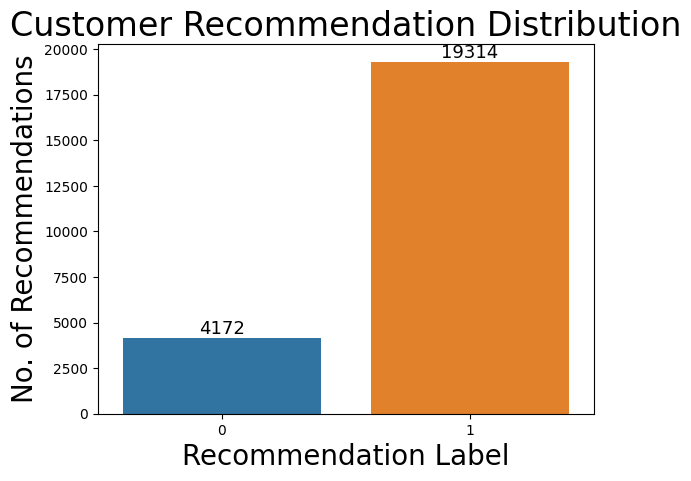

In [26]:
sns.countplot(x = df.recommended_ind, data = df)
plt.title('Customer Recommendation Distribution', fontsize=24)
plt.xlabel("Recommendation Label", fontsize=20)
plt.ylabel("No. of Recommendations", fontsize=20)

for index,value in enumerate(df.recommended_ind.value_counts().sort_values()):
     plt.text(index, value, f"{value}", ha="center", va="bottom", fontsize = 13);

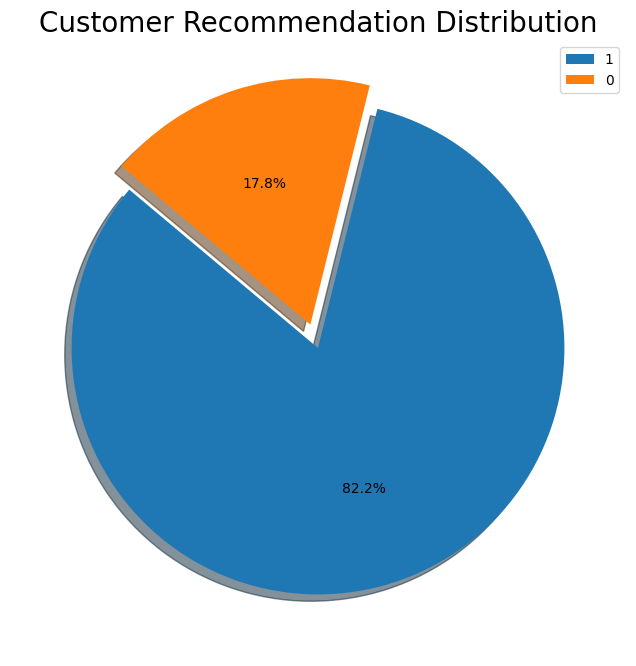

In [27]:
plt.figure(figsize=(8, 8))

explode = [0, 0.1]
plt.pie(df['recommended_ind'].value_counts(), explode=explode, autopct='%1.1f%%', shadow=True, startangle=140)
plt.legend(labels=['1', '0'])
plt.title('Customer Recommendation Distribution', fontsize=20)
plt.axis('off');

As you noticed that the target variable, "recommended_ind", in this study is imblanced so we will concentrate Recall score on evaluating the results rather than Accuracy score used in the evaluation of balanced data.

# The Examination of Other Features

The Examination of "rating" Variable

"rating" is a Positive Ordinal Integer variable for the product score granted by the customer from 1 Worst, to 5 Best.

In [28]:
df["rating"].value_counts()

5    13131
4     5077
3     2871
2     1565
1      842
Name: rating, dtype: int64

In [29]:
first_look("rating")

column name    :  rating
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  5
5    13131
4     5077
3     2871
2     1565
1      842
Name: rating, dtype: int64


In [30]:
df["rating"].describe().T

count    23486.000000
mean         4.196032
std          1.110031
min          1.000000
25%          4.000000
50%          5.000000
75%          5.000000
max          5.000000
Name: rating, dtype: float64

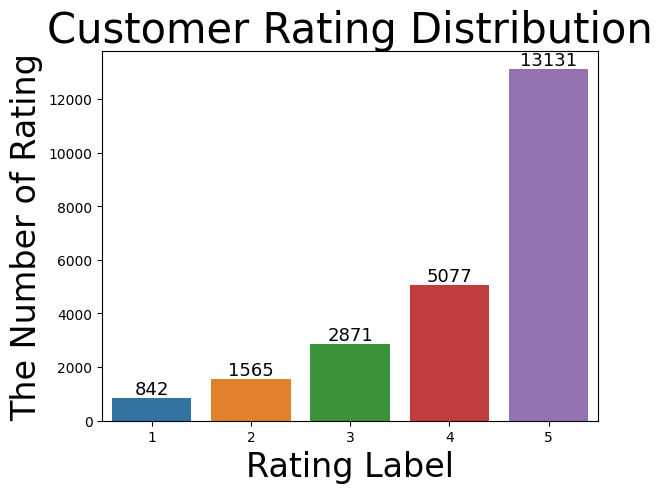

In [31]:
sns.countplot(x = df.rating, data = df)
plt.title('Customer Rating Distribution', fontsize=30)
plt.xlabel("Rating Label", fontsize=24)
plt.ylabel("The Number of Rating", fontsize=24)

for index,value in enumerate(df.rating.value_counts().sort_values()):
     plt.text(index, value, f"{value}", ha="center", va="bottom", fontsize = 13);

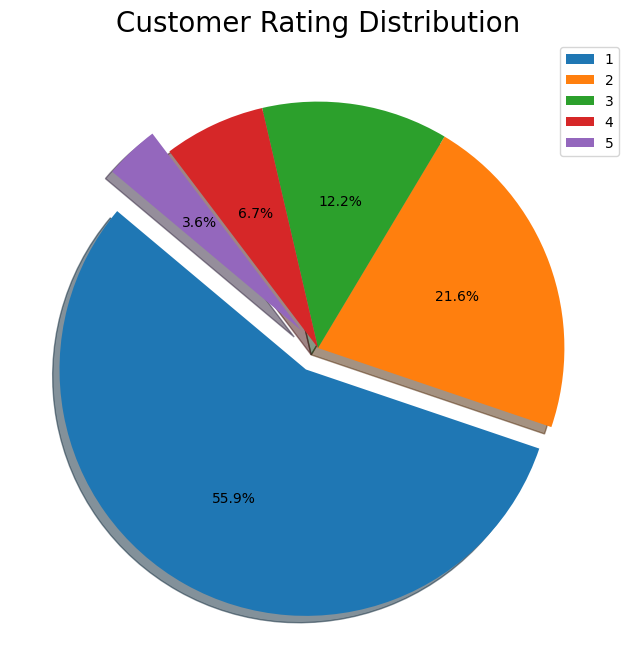

In [32]:
plt.figure(figsize=(8, 8))

explode = [0.1, 0, 0, 0, 0.1]
plt.pie(df['rating'].value_counts(), explode=explode, autopct='%1.1f%%', shadow=True, startangle=140)
plt.legend(labels=['1', '2', '3', '4','5'])
plt.title('Customer Rating Distribution', fontsize=20)
plt.axis('off');

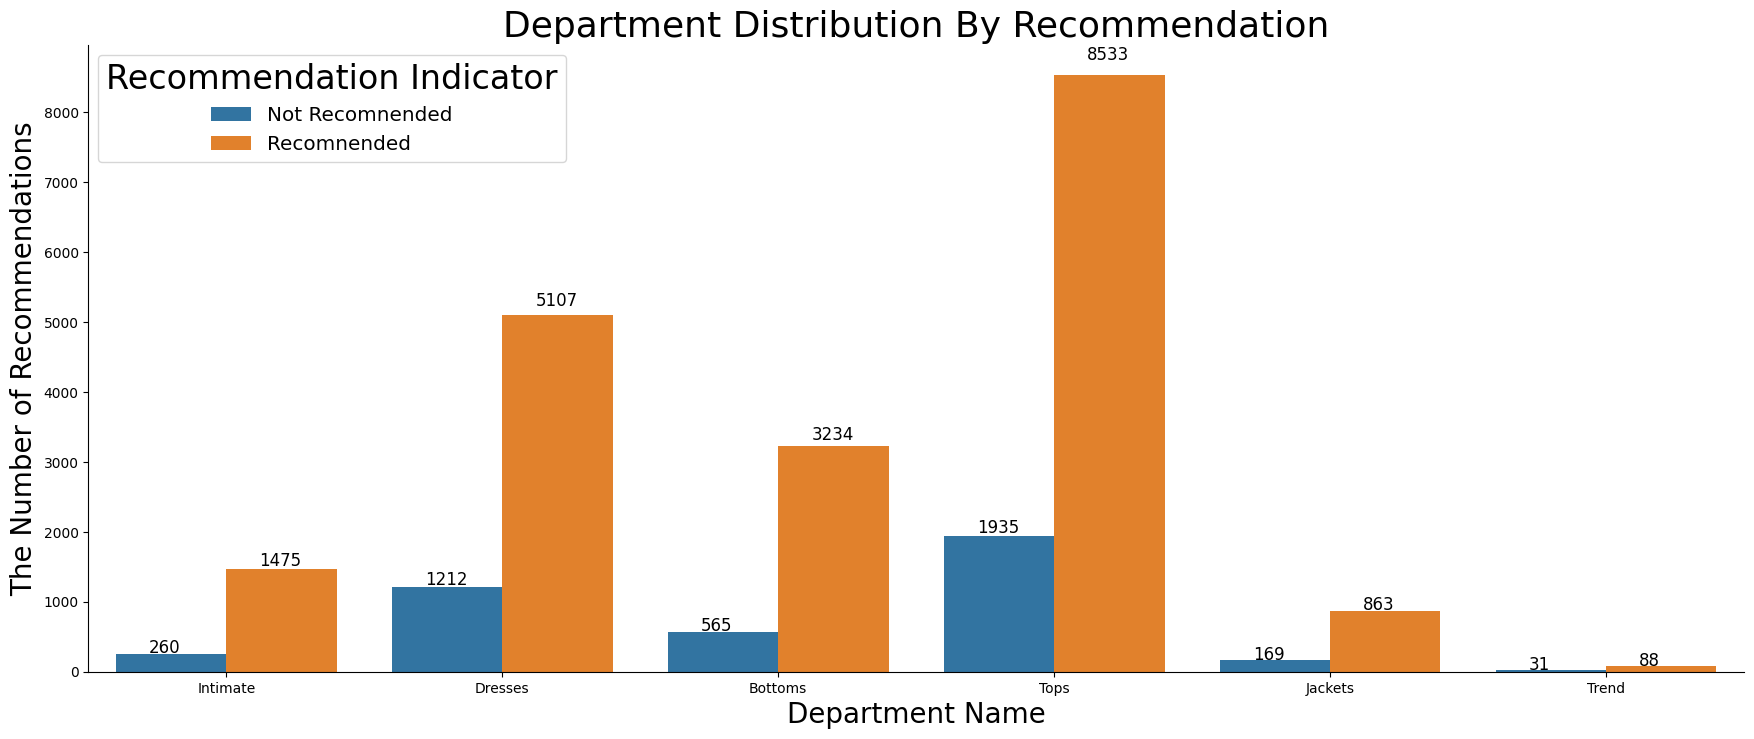

In [33]:
g = sns.catplot(data = df, x ="department_name", hue = "recommended_ind", kind='count', height=7, aspect=2.5, legend_out=False)

plt.title('Department Distribution By Recommendation', fontsize=26)
plt.xlabel("Department Name", fontsize=20)
plt.ylabel("The Number of Recommendations", fontsize=20)
plt.legend(title='Recommendation Indicator', loc='upper left', labels=['Not Recomnended', 'Recomnended'], fontsize='x-large', title_fontsize='24')

ax = g.facet_axis(0, 0)
for p in ax.patches:
    ax.text(p.get_x() + 0.12,
            p.get_height() * 1.025,
            '{0:.0f}'.format(p.get_height()),
            color='black', rotation='horizontal', size='large')

plt.show()

<Figure size 1500x800 with 0 Axes>

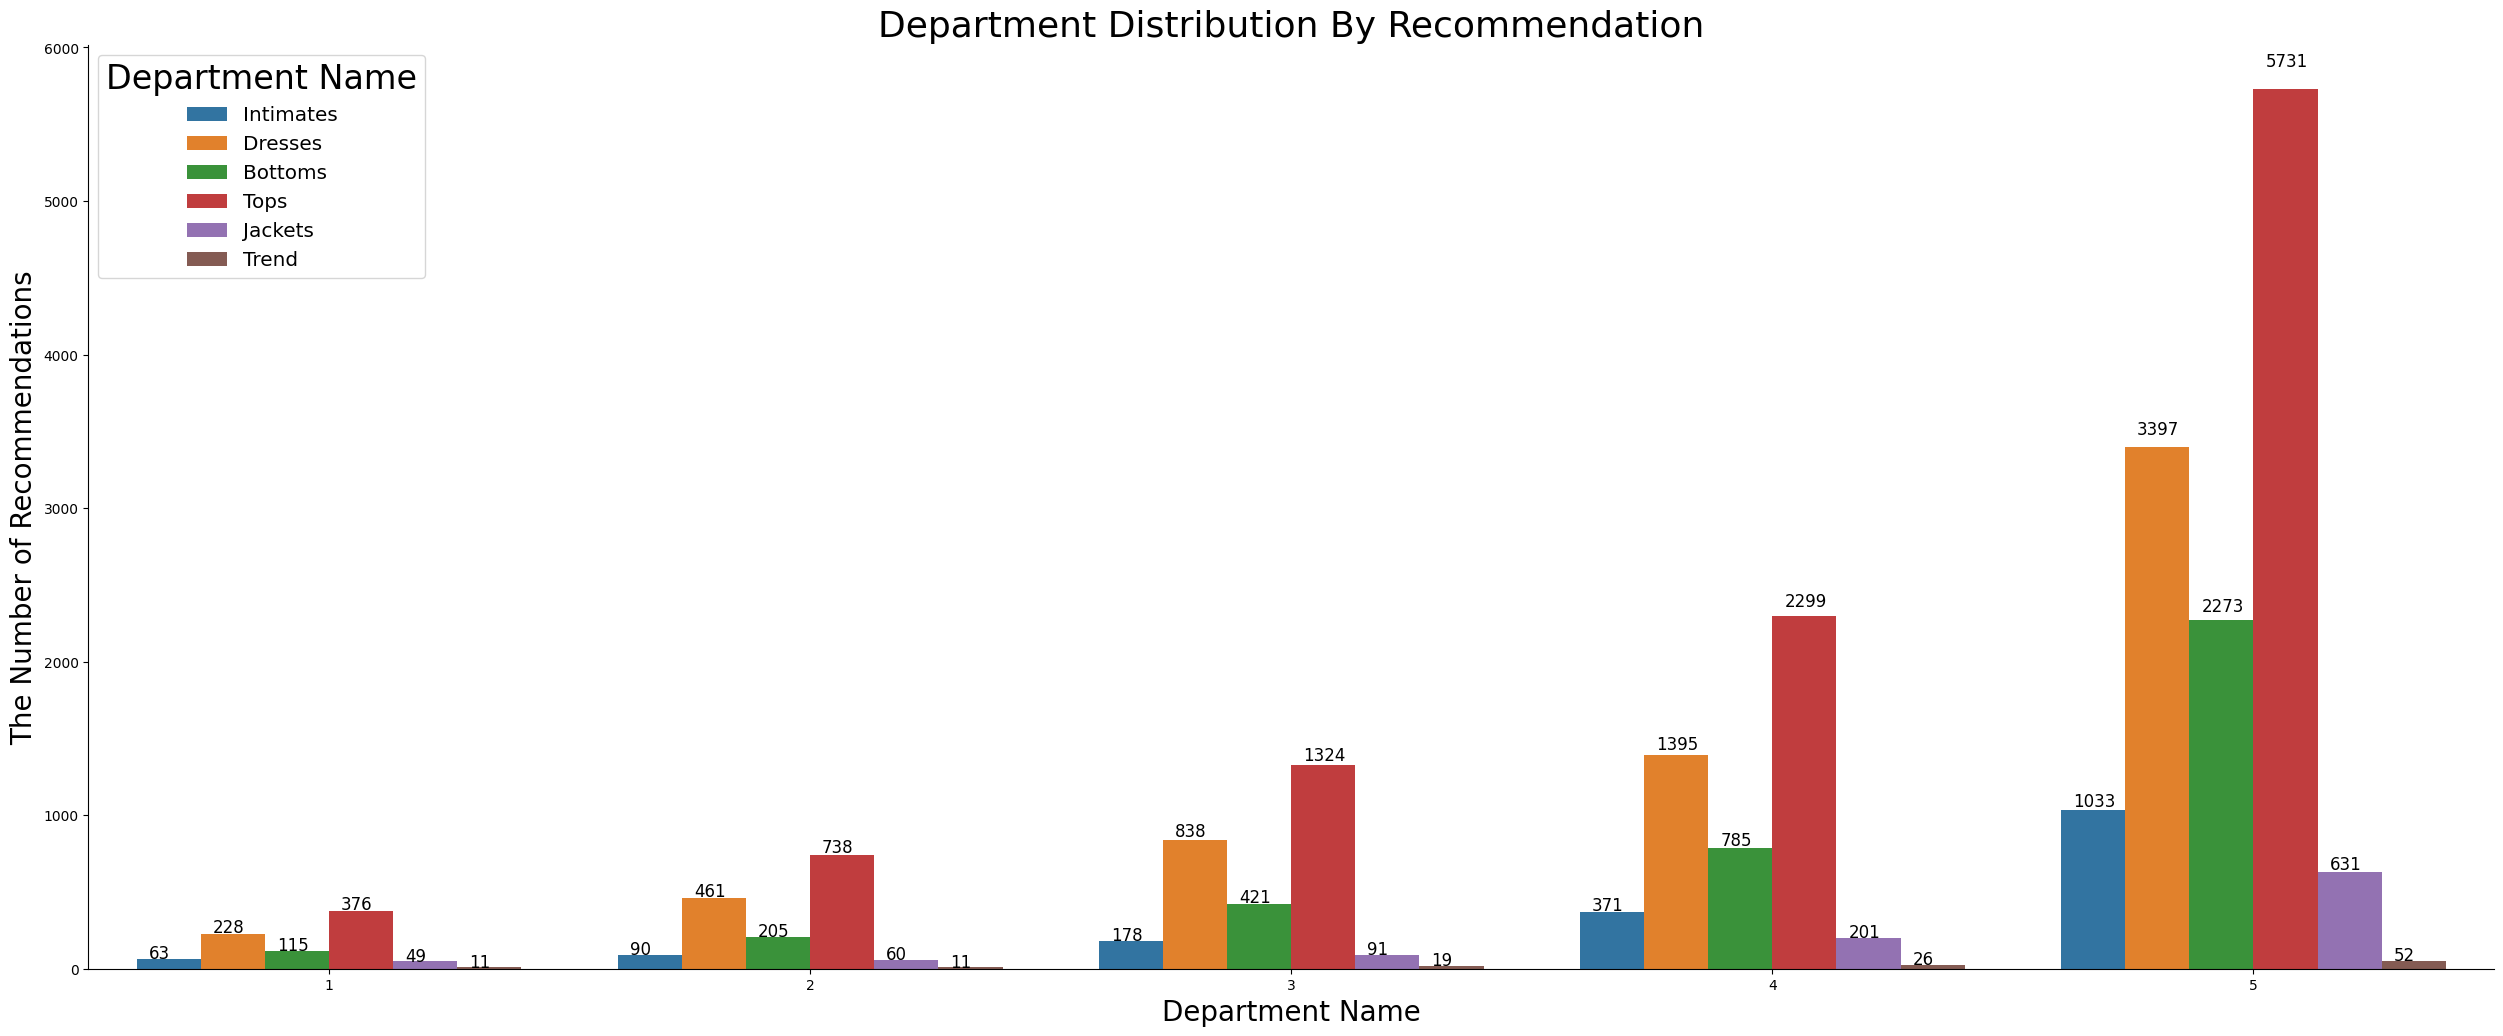

In [34]:
g = sns.catplot(data = df, x ="rating", hue = "department_name", kind='count', height=10, aspect=2.5, legend_out=False)

plt.title('Department Distribution By Recommendation', fontsize=26)
plt.xlabel("Department Name", fontsize=20)
plt.ylabel("The Number of Recommendations", fontsize=20)
plt.legend(title='Department Name', loc='upper left', labels=['Intimates', 'Dresses', 'Bottoms', 'Tops', 'Jackets', 'Trend'], fontsize='x-large', title_fontsize='24')
plt.figure(figsize=(15, 8))

ax = g.facet_axis(0, 0)
for p in ax.patches:
    ax.text(p.get_x() + 0.025,
            p.get_height() * 1.025,
            '{0:.0f}'.format(p.get_height()),
            color='black', rotation='horizontal', size='large')

plt.show()

# Let's create categorical and numerical sets for the examination of crosstab information.

In [35]:
df_cat = df[['division_name', 'department_name', 'class_name', "recommended_ind"]]
df_cat["recommended_ind"] = df_cat["recommended_ind"].apply(lambda x: "Recommended" if x>=1 else "Not Recommended")
df_cat.rename({'division_name': 'Division Name', 'department_name': 'Department Name', 'class_name': 'Class Name', 'recommended_ind': 'Recommendation Indicator'}, axis=1, inplace=True)
df_cat

,Division Name,Department Name,Class Name,Recommendation Indicator
0,Initmates,Intimate,Intimates,Recommended
1,General,Dresses,Dresses,Recommended
2,General,Dresses,Dresses,Not Recommended
3,General Petite,Bottoms,Pants,Recommended
4,General,Tops,Blouses,Recommended
...,...,...,...,...
23481,General Petite,Dresses,Dresses,Recommended
23482,General Petite,Tops,Knits,Recommended
23483,General Petite,Dresses,Dresses,Not Recommended
23484,General,Dresses,Dresses,Recommended


In [36]:
for i, col in enumerate(df_cat.columns):
    xtab = pd.crosstab(df_cat[col], df_cat["Recommendation Indicator"], normalize=True)
    print(colored('-'*55, 'red', attrs=['bold']), sep='')
    print(xtab*100)

-------------------------------------------------------
Recommendation Indicator  Not Recommended  Recommended
Division Name                                         
General                         10.808623    48.197853
General Petite                   6.019939    28.574472
Initmates                        0.945808     5.453306
-------------------------------------------------------
Recommendation Indicator  Not Recommended  Recommended
Department Name                                       
Bottoms                          2.407123    13.778119
Dresses                          5.163599    21.757839
Intimate                         1.107703     6.284083
Jackets                          0.720007     3.676721
Tops                             8.243865    36.353954
Trend                            0.132072     0.374915
-------------------------------------------------------
Recommendation Indicator  Not Recommended  Recommended
Class Name                                            
Blouses

# FEATURE SELECTION & DATA CLEANING

From now on, the DataFrame we will work with should contains two columns: "Review Text" and "Recommended IND". We can do the missing value detection operations from now on.

# Feature Selection

For later parts of the analysis, we will drop unnecassary columns for NLP.



In [37]:
df.head(1)

,clothing_id,age,title,review_text,rating,recommended_ind,positive_feedback_count,division_name,department_name,class_name,size,price
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates,S,80.817939


In [38]:
df.drop(['clothing_id', 'age', 'title', 'rating',
       'positive_feedback_count', 'division_name',
       'department_name', 'class_name','size', 'price'], axis=1, inplace=True)

In [39]:
df.head(3)

,review_text,recommended_ind
0,Absolutely wonderful - silky and sexy and comf...,1
1,Love this dress! it's sooo pretty. i happene...,1
2,I had such high hopes for this dress and reall...,0


# Detecting & Handling With Missing Values

In [40]:
df['review_text'].isnull().value_counts()

False    22641
True       845
Name: review_text, dtype: int64

In [41]:
df['recommended_ind'].isnull().value_counts()

False    23486
Name: recommended_ind, dtype: int64

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   review_text      22641 non-null  object
 1   recommended_ind  23486 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 367.1+ KB


In [43]:
df = df.dropna()

In [44]:
df['review_text'].isnull().value_counts()

False    22641
Name: review_text, dtype: int64

In [45]:
df['recommended_ind'].isnull().value_counts()

False    22641
Name: recommended_ind, dtype: int64

In [46]:
missing_values(df)

,Missing_Number,Missing_Percent


Sometimes we cannot detect missing values if they consist of empty (blank) string such as " ". In this situation we can use the following syntax.

In [47]:
blanks = []  # start with an empty list

for rv in df.itertuples(): # iterate over the DataFrame
    if type(rv)==str and rv.isspace(): # avoid NaN values and test 'review' for whitespace
        blanks.append(i)
blanks

[]

In [48]:
df["review_text"].str.isspace().sum()

0

In [49]:
df[df["review_text"].str.isspace() == True].index

Int64Index([], dtype='int64')

# Text Mining
Text is the most unstructured form of all the available data, therefore various types of noise are present in it. This means that the data is not readily analyzable without any pre-processing. The entire process of cleaning and standardization of text, making it noise-free and ready for analysis is known as text preprocessing.

The three key steps of text preprocessing:

1. Tokenization

2. Noise Removal

3. Lexicon Normalization

As the first step change text to tokens and convertion all of the words to lower case. Next remove punctuation, bad characters, numbers and stop words. The second step is aimed to normalization them throught the Lemmatization method.

In [50]:
def cleaning_fsa(data):

    import re
    from nltk.tokenize import word_tokenize
    from nltk.corpus import stopwords
    from nltk.stem import PorterStemmer

    # 1. Remove Puncs
    # \w typically matches [A-Za-z0-9_]
    text = re.sub('[^\w\s]', '', data)

    # 2. Tokenize
    text_tokens = word_tokenize(text.lower())

    # 3. Remove numbers
    tokens_without_punc = [w for w in text_tokens if w.isalpha()]

    # 4. Removing Stopwords
    stop_words = set(stopwords.words('english'))
    tokens_without_sw = [t for t in tokens_without_punc if t not in stop_words]

    # 5. Stemming (replace lemmatization)
    porter_stemmer = PorterStemmer()
    text_cleaned = [porter_stemmer.stem(t) for t in tokens_without_sw]

    # Joining
    return " ".join(text_cleaned)

In [51]:
text = "Absolutely wonderful happened - silky and se@y and comfortable 02@"
cleaned_text = cleaning_fsa(text)
print(cleaned_text)


absolut wonder happen silki sey comfort


In [52]:
text = cleaning_fsa(str(df["review_text"]))
text

'absolut wonder silki sexi comf love dress sooo pretti happen high hope dress reall love love love jumpsuit fun fl shirt flatter due th happi snag dress remind matern cloth soft stre fit well top see throug bought dress wed dress love platinum feminin name length dtype object'

In [53]:
df["review_text"] = df["review_text"].apply(cleaning_fsa)
df["review_text"].head()

0                    absolut wonder silki sexi comfort
1    love dress sooo pretti happen find store im gl...
2    high hope dress realli want work initi order p...
3    love love love jumpsuit fun flirti fabul everi...
4    shirt flatter due adjust front tie perfect len...
Name: review_text, dtype: object

In [54]:
text = cleaning_fsa(str(df["review_text"]))
text

'absolut wonder silki sexi comfort love dress sooo pretti happen find store im gl high hope dress realli want work initi order p love love love jumpsuit fun flirti fabul everi shirt flatter due adjust front tie perfect len happi snag dress great price easi slip flatter remind matern cloth soft stretchi shini materi fit well top see never would work im glad abl bought dress wed summer cute unfortun fit isnt dress love platinum feminin fit perfectli easi name length dtype object'

In [55]:
df.head(3)

,review_text,recommended_ind
0,absolut wonder silki sexi comfort,1
1,love dress sooo pretti happen find store im gl...,1
2,high hope dress realli want work initi order p...,0


# Handling With Rare Words

In [56]:
" ".join(df["review_text"]).split()

['absolut',
 'wonder',
 'silki',
 'sexi',
 'comfort',
 'love',
 'dress',
 'sooo',
 'pretti',
 'happen',
 'find',
 'store',
 'im',
 'glad',
 'bc',
 'never',
 'would',
 'order',
 'onlin',
 'bc',
 'petit',
 'bought',
 'petit',
 'love',
 'length',
 'hit',
 'littl',
 'knee',
 'would',
 'definit',
 'true',
 'midi',
 'someon',
 'truli',
 'petit',
 'high',
 'hope',
 'dress',
 'realli',
 'want',
 'work',
 'initi',
 'order',
 'petit',
 'small',
 'usual',
 'size',
 'found',
 'outrag',
 'small',
 'small',
 'fact',
 'could',
 'zip',
 'reorder',
 'petit',
 'medium',
 'ok',
 'overal',
 'top',
 'half',
 'comfort',
 'fit',
 'nice',
 'bottom',
 'half',
 'tight',
 'layer',
 'sever',
 'somewhat',
 'cheap',
 'net',
 'layer',
 'imo',
 'major',
 'design',
 'flaw',
 'net',
 'layer',
 'sewn',
 'directli',
 'zipper',
 'c',
 'love',
 'love',
 'love',
 'jumpsuit',
 'fun',
 'flirti',
 'fabul',
 'everi',
 'time',
 'wear',
 'get',
 'noth',
 'great',
 'compliment',
 'shirt',
 'flatter',
 'due',
 'adjust',
 'front',
 

In [57]:
word_values = pd.Series(" ".join(df["review_text"]).split()).value_counts()
word_values

dress          12061
love           11350
fit            11310
size           10597
look            9276
               ...  
horsebedeck        1
begun              1
xsmal              1
chestwhol          1
platinum           1
Length: 13798, dtype: int64

In [58]:
rare_words = word_values[word_values <= 2]
rare_words

thesethey      2
bubblelik      2
the            2
captiv         2
spotlight      2
              ..
horsebedeck    1
begun          1
xsmal          1
chestwhol      1
platinum       1
Length: 9084, dtype: int64

In [59]:
rare_words.value_counts()

1    7570
2    1514
dtype: int64

In [60]:
len(rare_words)

9084

In [61]:
rare_words.index

Index(['thesethey', 'bubblelik', 'the', 'captiv', 'spotlight', 'plate',
       'campu', 'chees', 'charleston', 'creambeig',
       ...
       'disclaim', 'heavylift', 'fullrang', 'roomymor', 'nerdi', 'horsebedeck',
       'begun', 'xsmal', 'chestwhol', 'platinum'],
      dtype='object', length=9084)

# removing rare words

In [62]:
df["review_text"] = df["review_text"].apply(lambda x: " ".join([i for i in x.split() if i not in rare_words.index]))
df["review_text"].head()

0                    absolut wonder silki sexi comfort
1    love dress sooo pretti happen find store im gl...
2    high hope dress realli want work initi order p...
3    love love love jumpsuit fun flirti fabul everi...
4    shirt flatter due adjust front tie perfect len...
Name: review_text, dtype: object

In [63]:
len("review_text")

11

In [64]:
df.head(3)

,review_text,recommended_ind
0,absolut wonder silki sexi comfort,1
1,love dress sooo pretti happen find store im gl...,1
2,high hope dress realli want work initi order p...,0


# WORLDCLOUD - REPETITION OF WORDS

Word Cloud is a data visualization technique used for representing text data in which the size of each word indicates its frequency or importance. Significant textual data points can be highlighted using a word cloud.

We are expected to create separate word clouds for positive and negative reviews. As such we can qualify a review as positive or negative, by looking at its recommended status.

We can follow the steps below:

Detect Reviews

Collect Words

Create Word Cloud

# The Detection of Positive and Negative Reviews

In [65]:
df.columns

Index(['review_text', 'recommended_ind'], dtype='object')

In [66]:
df[df["recommended_ind"] == 0]

,review_text,recommended_ind
2,high hope dress realli want work initi order p...,0
5,love traci rees dress one petit feet tall usua...,0
10,dress run small esp zipper area run order sp t...,0
22,first pullov style side zipper wouldnt purchas...,0
25,love materi didnt realli look long dress purch...,0
...,...,...
23449,tri color realli pretti fun want pair pant loo...,0
23450,want love jacket soft great color unfortun lig...,0
23460,purchas good price typic love maev winwin fabr...,0
23478,surpris posit review product terribl cut weird...,0


In [67]:
df[df["recommended_ind"] == 1]

,review_text,recommended_ind
0,absolut wonder silki sexi comfort,1
1,love dress sooo pretti happen find store im gl...,1
3,love love love jumpsuit fun flirti fabul everi...,1
4,shirt flatter due adjust front tie perfect len...,1
6,basket hte last see would look like person sto...,1
...,...,...
23479,wasnt sure order skirt couldnt see person firs...,1
23481,happi snag dress great price easi slip flatter...,1
23482,remind matern cloth soft stretchi shini materi...,1
23484,bought dress wed summer cute unfortun fit isnt...,1


In [68]:
df["recommended_ind"].value_counts()

1    18540
0     4101
Name: recommended_ind, dtype: int64

# The Collection of Positive and Negative Words

Collect Words (positive and negative separately)

In [69]:
" ".join(df["review_text"]).split()

['absolut',
 'wonder',
 'silki',
 'sexi',
 'comfort',
 'love',
 'dress',
 'sooo',
 'pretti',
 'happen',
 'find',
 'store',
 'im',
 'glad',
 'bc',
 'never',
 'would',
 'order',
 'onlin',
 'bc',
 'petit',
 'bought',
 'petit',
 'love',
 'length',
 'hit',
 'littl',
 'knee',
 'would',
 'definit',
 'true',
 'midi',
 'someon',
 'truli',
 'petit',
 'high',
 'hope',
 'dress',
 'realli',
 'want',
 'work',
 'initi',
 'order',
 'petit',
 'small',
 'usual',
 'size',
 'found',
 'outrag',
 'small',
 'small',
 'fact',
 'could',
 'zip',
 'reorder',
 'petit',
 'medium',
 'ok',
 'overal',
 'top',
 'half',
 'comfort',
 'fit',
 'nice',
 'bottom',
 'half',
 'tight',
 'layer',
 'sever',
 'somewhat',
 'cheap',
 'net',
 'layer',
 'imo',
 'major',
 'design',
 'flaw',
 'net',
 'layer',
 'sewn',
 'directli',
 'zipper',
 'c',
 'love',
 'love',
 'love',
 'jumpsuit',
 'fun',
 'flirti',
 'fabul',
 'everi',
 'time',
 'wear',
 'get',
 'noth',
 'great',
 'compliment',
 'shirt',
 'flatter',
 'due',
 'adjust',
 'front',
 

In [70]:
neg_words = " ".join(df[df["recommended_ind"] == 0].review_text).split()
neg_words

['high',
 'hope',
 'dress',
 'realli',
 'want',
 'work',
 'initi',
 'order',
 'petit',
 'small',
 'usual',
 'size',
 'found',
 'outrag',
 'small',
 'small',
 'fact',
 'could',
 'zip',
 'reorder',
 'petit',
 'medium',
 'ok',
 'overal',
 'top',
 'half',
 'comfort',
 'fit',
 'nice',
 'bottom',
 'half',
 'tight',
 'layer',
 'sever',
 'somewhat',
 'cheap',
 'net',
 'layer',
 'imo',
 'major',
 'design',
 'flaw',
 'net',
 'layer',
 'sewn',
 'directli',
 'zipper',
 'c',
 'love',
 'traci',
 'rees',
 'dress',
 'one',
 'petit',
 'feet',
 'tall',
 'usual',
 'wear',
 'brand',
 'dress',
 'pretti',
 'packag',
 'lot',
 'dress',
 'skirt',
 'long',
 'full',
 'overwhelm',
 'small',
 'frame',
 'stranger',
 'alter',
 'shorten',
 'narrow',
 'skirt',
 'would',
 'take',
 'away',
 'embellish',
 'garment',
 'love',
 'color',
 'idea',
 'style',
 'work',
 'return',
 'dress',
 'dress',
 'run',
 'small',
 'esp',
 'zipper',
 'area',
 'run',
 'order',
 'sp',
 'typic',
 'fit',
 'tight',
 'materi',
 'top',
 'look',
 'f

In [71]:
pos_words =" ".join(df[df["recommended_ind"] == 1].review_text).split()
pos_words

['absolut',
 'wonder',
 'silki',
 'sexi',
 'comfort',
 'love',
 'dress',
 'sooo',
 'pretti',
 'happen',
 'find',
 'store',
 'im',
 'glad',
 'bc',
 'never',
 'would',
 'order',
 'onlin',
 'bc',
 'petit',
 'bought',
 'petit',
 'love',
 'length',
 'hit',
 'littl',
 'knee',
 'would',
 'definit',
 'true',
 'midi',
 'someon',
 'truli',
 'petit',
 'love',
 'love',
 'love',
 'jumpsuit',
 'fun',
 'flirti',
 'fabul',
 'everi',
 'time',
 'wear',
 'get',
 'noth',
 'great',
 'compliment',
 'shirt',
 'flatter',
 'due',
 'adjust',
 'front',
 'tie',
 'perfect',
 'length',
 'wear',
 'leg',
 'sleeveless',
 'pair',
 'well',
 'cardigan',
 'love',
 'shirt',
 'basket',
 'hte',
 'last',
 'see',
 'would',
 'look',
 'like',
 'person',
 'store',
 'pick',
 'went',
 'teh',
 'color',
 'pale',
 'hte',
 'color',
 'realli',
 'gorgeou',
 'turn',
 'tri',
 'littl',
 'baggi',
 'hte',
 'xs',
 'hte',
 'size',
 'bummer',
 'petit',
 'decid',
 'though',
 'said',
 'everyth',
 'pant',
 'skirt',
 'tri',
 'kept',
 'oop',
 'order'

# Creating of Word Cloud

We create Word Cloud for most common words in recommended not recommended reviews separately.

In [72]:
review_text = df["review_text"]

In [73]:
all_words = " ".join(review_text)

In [74]:
all_words[:100]

'absolut wonder silki sexi comfort love dress sooo pretti happen find store im glad bc never would or'

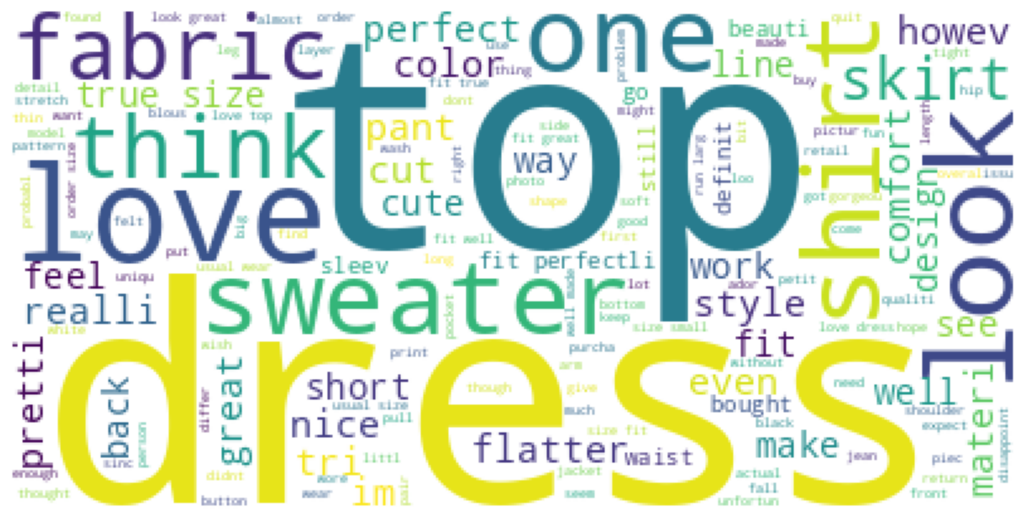

In [75]:
from wordcloud import WordCloud

wordcloud = WordCloud(background_color="white", max_words =250).generate(all_words)

plt.figure(figsize = (13, 13))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

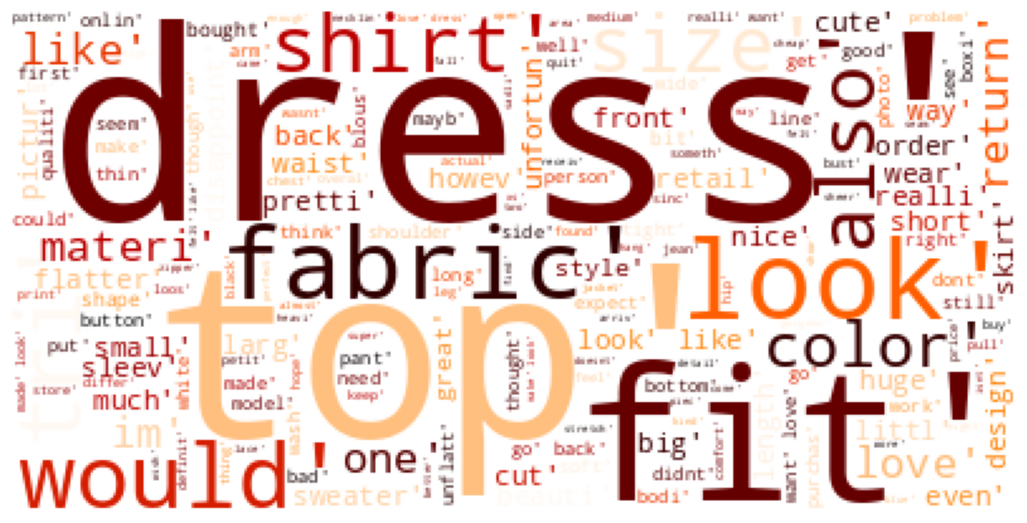

In [76]:
wordcloud = WordCloud(background_color="white", max_words =250, colormap='gist_heat').generate(str(neg_words))

plt.figure(figsize = (13, 13))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

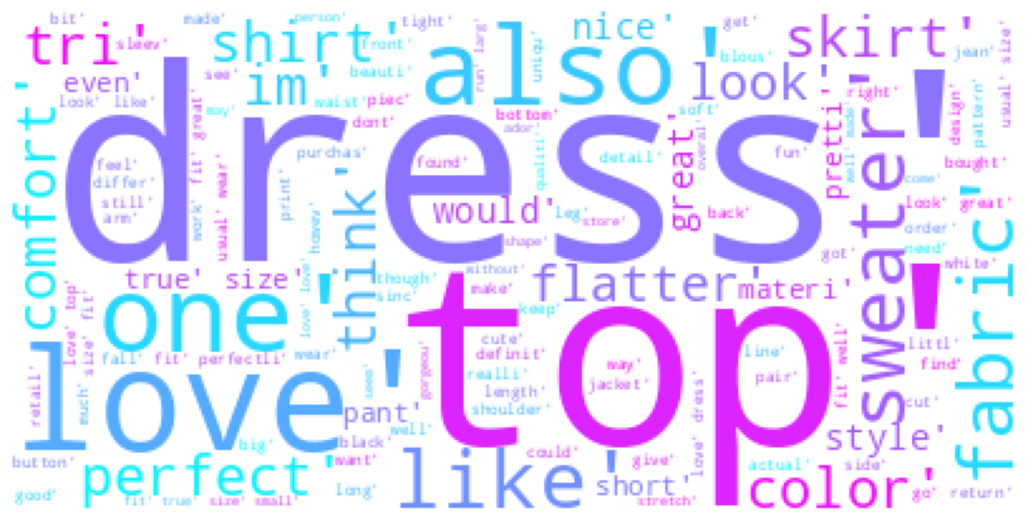

In [77]:
wordcloud = WordCloud(background_color="white", max_words =250, colormap='cool').generate(str(pos_words))

plt.figure(figsize = (13, 13))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

# SENTIMENT CLASSIFICATION WITH MACHINE LEARNING & DEEP LEARNING

Before moving on to modeling, as data preprocessing steps WE will need to perform vectorization and train-test split.

Machine learning algorithms most often take numeric feature vectors as input. Thus, when working with text documents, we need a way to convert each document into a numeric vector. This process is known as text vectorization. Commonly used vectorization approach that we will use here is to represent each text as a vector of word counts.



# To run machine learning algorithms we need to convert text files into numerical feature vectors. We will use bag of words model for our analysis.

In [78]:
df.head()

,review_text,recommended_ind
0,absolut wonder silki sexi comfort,1
1,love dress sooo pretti happen find store im gl...,1
2,high hope dress realli want work initi order p...,0
3,love love love jumpsuit fun flirti fabul everi...,1
4,shirt flatter due adjust front tie perfect len...,1


In [79]:
from sklearn.model_selection import train_test_split

In [80]:
X = df["review_text"]
y= df["recommended_ind"]

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=101)

# In the next step, we will create a numerical feature vector for each document:

# Vectorization

In [82]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [83]:
tf_idf_vectorizer = TfidfVectorizer()

X_train_tf_idf = tf_idf_vectorizer.fit_transform(X_train)
X_test_tf_idf = tf_idf_vectorizer.transform(X_test)

In [84]:
X_train_tf_idf.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [85]:
pd.DataFrame(X_train_tf_idf.toarray(), columns = tf_idf_vectorizer.get_feature_names_out())

,aa,ab,abbi,abdomen,abil,abl,abnorm,abo,abovethekne,absolut,...,yucki,yummi,zag,zero,zig,zigzag,zip,zipper,zone,zoom
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18107,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18108,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18109,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18110,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Before diving into modelling, we will create a User-Defined-Function for comparing models at the end.

In [86]:
from sklearn.metrics import confusion_matrix,classification_report, f1_score, recall_score, accuracy_score, precision_score

In [87]:
def eval(model, X_train, X_test):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)

    print("Test_Set")
    print(classification_report(y_test, y_pred))
    print("Train_Set")
    print(classification_report(y_train, y_pred_train))

Now it's time to train all models using TFIDF vectorizer data.

# MACHINE LEARNING MODELLING

# SVM

In [88]:
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score

# Support Vector Machine (SVM) With TF-IDF Vectorizer

In [89]:
svc = LinearSVC(C=0.01, class_weight="balanced", random_state=101)

svc.fit(X_train_tf_idf, y_train)

LinearSVC(C=0.01, class_weight='balanced', random_state=101)

In [90]:
print("SVC MODEL")

eval(svc, X_train_tf_idf, X_test_tf_idf)

SVC MODEL
Test_Set
              precision    recall  f1-score   support

           0       0.55      0.85      0.67       820
           1       0.96      0.84      0.90      3709

    accuracy                           0.85      4529
   macro avg       0.76      0.85      0.78      4529
weighted avg       0.89      0.85      0.86      4529

Train_Set
              precision    recall  f1-score   support

           0       0.56      0.88      0.69      3281
           1       0.97      0.85      0.90     14831

    accuracy                           0.85     18112
   macro avg       0.77      0.86      0.79     18112
weighted avg       0.90      0.85      0.86     18112



In [91]:
custom_scorer = {'accuracy': make_scorer(accuracy_score),
                 'precision-0': make_scorer(precision_score, pos_label=0),
                 'recall-0': make_scorer(recall_score, pos_label=0),
                 'f1-0': make_scorer(f1_score, pos_label=0),
                 'precision-1': make_scorer(precision_score, pos_label=1),
                 'recall-1': make_scorer(recall_score, pos_label=1),
                 'f1-1': make_scorer(f1_score, pos_label=1)
                 }

for i, j in custom_scorer.items():
    model = LinearSVC(C=0.01, class_weight="balanced", random_state=101)
    scores = cross_val_score(model, X_train_tf_idf, y_train, cv = 10, scoring = j).mean()
    if i == "recall-1":
        svc_tfidf_rec = scores
    elif i == "f1-1":
        svc_tfidf_f1 = scores
    print(f" {i:20} score for tfidf : {scores}\n")

 accuracy             score for tfidf : 0.8418722413799408

 precision-0          score for tfidf : 0.5407360094828884

 recall-0             score for tfidf : 0.8497433093631848

 f1-0                 score for tfidf : 0.6607530661956182

 precision-1          score for tfidf : 0.9619659889548438

 recall-1             score for tfidf : 0.8401319173453679

 f1-1                 score for tfidf : 0.896895065953804



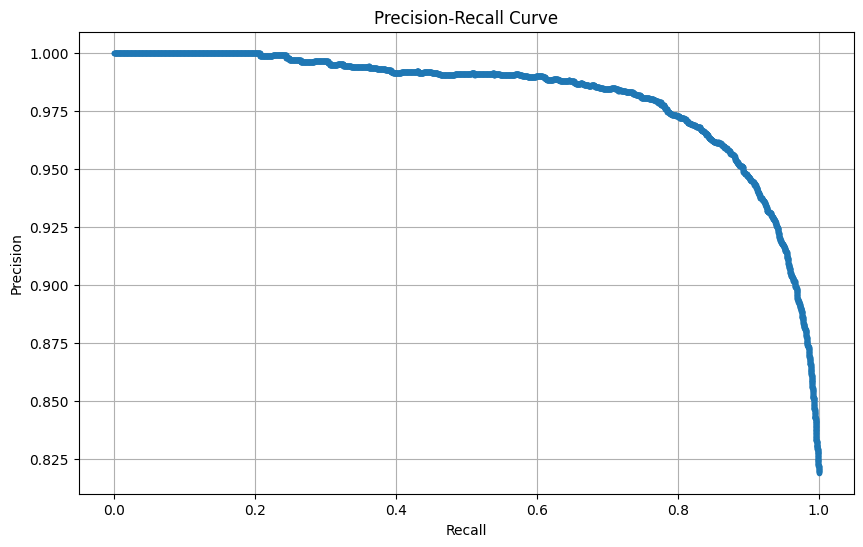

Average Precision (AP): 0.9811


In [92]:
from sklearn.svm import LinearSVC
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

# Create your LinearSVC model
model = LinearSVC(C=0.01, class_weight="balanced", random_state=101)

# Fit the model to your training data (X_train_tf_idf, y_train)
model.fit(X_train_tf_idf, y_train)

# Calculate precision and recall
precision, recall, thresholds = precision_recall_curve(y_test, model.decision_function(X_test_tf_idf))

# Calculate the average precision (AP)
ap = average_precision_score(y_test, model.decision_function(X_test_tf_idf))

# Plot the precision-recall curve
plt.figure(figsize=(10, 6))
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.grid(True)
plt.show()

# Print the average precision (AP)
print(f'Average Precision (AP): {ap:.4f}')

## **Random Forest**

# Random Forest With TF-IDF Vectorizer

In [93]:
rf = RandomForestClassifier(200, max_depth = 10, random_state = 42, n_jobs = -1, class_weight="balanced")

rf.fit(X_train_tf_idf, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=10, n_estimators=200,
                       n_jobs=-1, random_state=42)

In [94]:
print("RF MODEL")

eval(rf, X_train_tf_idf, X_test_tf_idf)

RF MODEL
Test_Set
              precision    recall  f1-score   support

           0       0.52      0.78      0.62       820
           1       0.94      0.84      0.89      3709

    accuracy                           0.83      4529
   macro avg       0.73      0.81      0.76      4529
weighted avg       0.87      0.83      0.84      4529

Train_Set
              precision    recall  f1-score   support

           0       0.59      0.89      0.71      3281
           1       0.97      0.86      0.91     14831

    accuracy                           0.87     18112
   macro avg       0.78      0.88      0.81     18112
weighted avg       0.90      0.87      0.88     18112



In [95]:
custom_scorer = {'accuracy': make_scorer(accuracy_score),
                 'precision-0': make_scorer(precision_score, pos_label=0),
                 'recall-0': make_scorer(recall_score, pos_label=0),
                 'f1-0': make_scorer(f1_score, pos_label=0),
                 'precision-1': make_scorer(precision_score, pos_label=1),
                 'recall-1': make_scorer(recall_score, pos_label=1),
                 'f1-1': make_scorer(f1_score, pos_label=1)
                 }

for i, j in custom_scorer.items():
    model = RandomForestClassifier(200, max_depth = 10, random_state = 42, n_jobs = -1, class_weight="balanced")
    scores = cross_val_score(model, X_train_tf_idf, y_train, cv = 10, scoring = j).mean()
    if i == "recall-1":
        rf_tfidf_rec = scores
    elif i == "f1-1":
        rf_tfidf_f1 = scores
    print(f" {i:20} score for tfidf : {scores}\n")

 accuracy             score for tfidf : 0.8341419495528308

 precision-0          score for tfidf : 0.5293212919936774

 recall-0             score for tfidf : 0.7796343316776633

 f1-0                 score for tfidf : 0.6301440357960194

 precision-1          score for tfidf : 0.9456024922337297

 recall-1             score for tfidf : 0.8462000152673699

 f1-1                 score for tfidf : 0.893062929148096



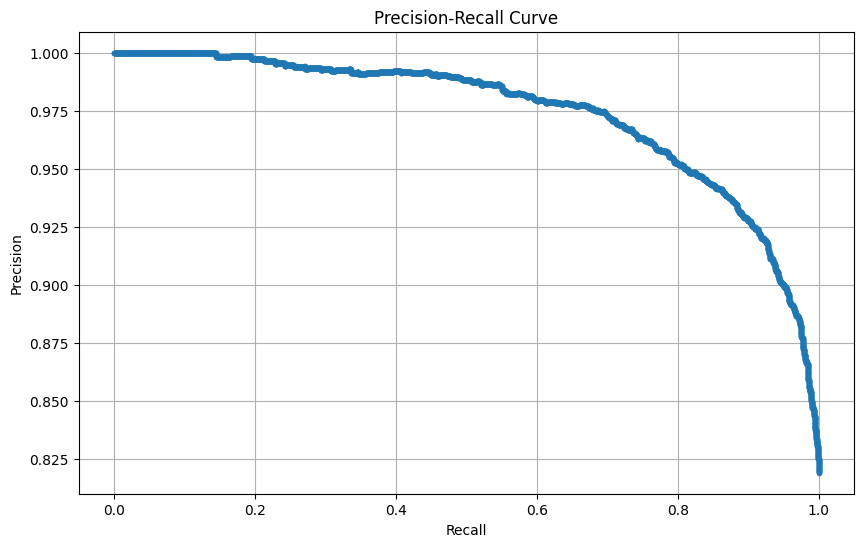

Average Precision (AP): 0.9738


In [96]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

model = RandomForestClassifier(n_estimators=200, max_depth=10, random_state=42, n_jobs=-1, class_weight="balanced")

model.fit(X_train_tf_idf, y_train)

y_score = model.predict_proba(X_test_tf_idf)[:, 1]
precision, recall, _ = precision_recall_curve(y_test, y_score)

ap = average_precision_score(y_test, y_score)

plt.figure(figsize=(10, 6))
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.grid(True)
plt.show()

print(f'Average Precision (AP): {ap:.4f}')

# **Logistic Regression**

# **Logistic Regression With TF-IDF Vectorizer**

In [97]:
log = LogisticRegression(C=0.1, max_iter=1000, random_state=101, class_weight="balanced")

log.fit(X_train_tf_idf,y_train)

LogisticRegression(C=0.1, class_weight='balanced', max_iter=1000,
                   random_state=101)

In [98]:
print("LOG MODEL")

eval(log, X_train_tf_idf, X_test_tf_idf)

LOG MODEL
Test_Set
              precision    recall  f1-score   support

           0       0.55      0.85      0.67       820
           1       0.96      0.84      0.90      3709

    accuracy                           0.85      4529
   macro avg       0.76      0.85      0.78      4529
weighted avg       0.89      0.85      0.86      4529

Train_Set
              precision    recall  f1-score   support

           0       0.56      0.88      0.69      3281
           1       0.97      0.85      0.91     14831

    accuracy                           0.85     18112
   macro avg       0.77      0.87      0.80     18112
weighted avg       0.90      0.85      0.87     18112



In [99]:
custom_scorer = {'accuracy': make_scorer(accuracy_score),
                 'precision-0': make_scorer(precision_score, pos_label=0),
                 'recall-0': make_scorer(recall_score, pos_label=0),
                 'f1-0': make_scorer(f1_score, pos_label=0),
                 'precision-1': make_scorer(precision_score, pos_label=1),
                 'recall-1': make_scorer(recall_score, pos_label=1),
                 'f1-1': make_scorer(f1_score, pos_label=1)
                 }

for i, j in custom_scorer.items():
    LogisticRegression(C=0.1, max_iter=1000, random_state=101, class_weight="balanced")
    scores = cross_val_score(model, X_train_tf_idf, y_train, cv = 10, scoring = j).mean()
    if i == "recall-1":
        log_tfidf_rec = scores
    elif i == "f1-1":
        log_tfidf_f1 = scores
    print(f" {i:20} score for tfidf : {scores}\n")

 accuracy             score for tfidf : 0.8341419495528308

 precision-0          score for tfidf : 0.5293212919936774

 recall-0             score for tfidf : 0.7796343316776633

 f1-0                 score for tfidf : 0.6301440357960194

 precision-1          score for tfidf : 0.9456024922337297

 recall-1             score for tfidf : 0.8462000152673699

 f1-1                 score for tfidf : 0.893062929148096



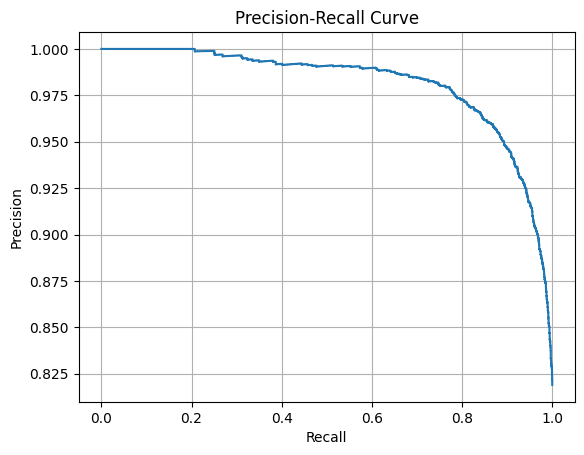

Average Precision (AP): 0.9811


In [100]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.metrics import PrecisionRecallDisplay
import matplotlib.pyplot as plt

# Create your LogisticRegression model
model = LogisticRegression(C=0.1, max_iter=1000, random_state=101, class_weight="balanced")

# Fit the model to your training data (X_train_tf_idf, y_train)
model.fit(X_train_tf_idf, y_train)

# Calculate precision and recall
precision, recall, thresholds = precision_recall_curve(y_test, model.decision_function(X_test_tf_idf))

# Calculate the average precision (AP)
ap = average_precision_score(y_test, model.decision_function(X_test_tf_idf))

# Plot the precision-recall curve
display = PrecisionRecallDisplay(precision=precision, recall=recall)
display.plot(ax=plt.gca())
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.grid(True)
plt.show()

# Print the average precision (AP)
print(f'Average Precision (AP): {ap:.4f}')


# **Naive Bayes**

**Naive Bayes With TF-IDF Vectorizer***

In [101]:
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
nb = MultinomialNB()
nb.fit(X_train_tf_idf, y_train)

MultinomialNB()

In [102]:
print("NB MODEL")
eval(nb, X_train_tf_idf, X_test_tf_idf)

NB MODEL
Test_Set
              precision    recall  f1-score   support

           0       0.87      0.16      0.27       820
           1       0.84      0.99      0.91      3709

    accuracy                           0.84      4529
   macro avg       0.85      0.58      0.59      4529
weighted avg       0.85      0.84      0.80      4529

Train_Set
              precision    recall  f1-score   support

           0       0.94      0.20      0.33      3281
           1       0.85      1.00      0.92     14831

    accuracy                           0.85     18112
   macro avg       0.89      0.60      0.62     18112
weighted avg       0.87      0.85      0.81     18112



In [103]:
custom_scorer = {'accuracy': make_scorer(accuracy_score),
                 'precision-0': make_scorer(precision_score, pos_label=0),
                 'recall-0': make_scorer(recall_score, pos_label=0),
                 'f1-0': make_scorer(f1_score, pos_label=0),
                 'precision-1': make_scorer(precision_score, pos_label=1),
                 'recall-1': make_scorer(recall_score, pos_label=1),
                 'f1-1': make_scorer(f1_score, pos_label=1)
                 }

for i, j in custom_scorer.items():
    model = BernoulliNB()
    scores = cross_val_score(model, X_train_tf_idf, y_train, cv = 10, scoring = j).mean()
    if i == "recall-1":
        nb_tfidf_rec = scores
    elif i == "f1-1":
        nb_tfidf_f1 = scores
    print(f" {i:20} score for tfidf : {scores}\n")

 accuracy             score for tfidf : 0.8725707992486436

 precision-0          score for tfidf : 0.6332970899579454

 recall-0             score for tfidf : 0.7055841797019793

 f1-0                 score for tfidf : 0.6673027796305521

 precision-1          score for tfidf : 0.93319553703528

 recall-1             score for tfidf : 0.9095143431486769

 f1-1                 score for tfidf : 0.921186645221076



In [105]:
pip install scikit-plot

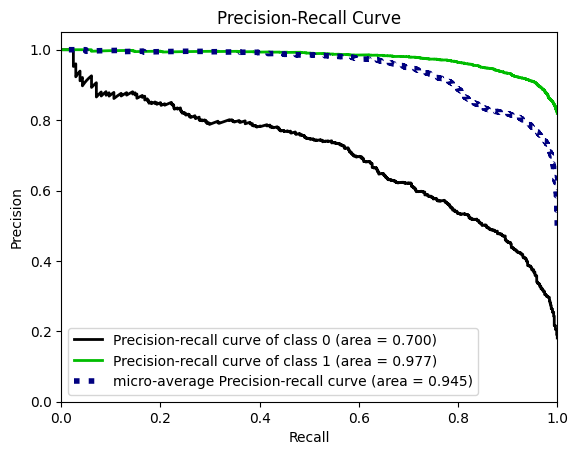

In [106]:
from sklearn.naive_bayes import MultinomialNB
from scikitplot.metrics import plot_precision_recall
import matplotlib.pyplot as plt

# Create your Multinomial Naive Bayes model
model = MultinomialNB()

# Fit the model to your training data (X_train_tf_idf, y_train)
model.fit(X_train_tf_idf, y_train)

# Use the model to predict probabilities
y_probas = model.predict_proba(X_test_tf_idf)

# Use scikit-plot to create the precision-recall curve
plot_precision_recall(y_test, y_probas)


# Show the plot
plt.show()


# MODEL COMPARISONS

# Deep Learning Model

In [ ]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GRU, Embedding
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
df0 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/FYPproject/fyp/Womens Clothing E-Commerce Reviews.csv')
df_dl = df0.copy()
df_dl.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [ ]:
df_dl = df_dl[["Review Text","Recommended IND"]]
df_dl.head()

,Review Text,Recommended IND
0,Absolutely wonderful - silky and sexy and comf...,1
1,Love this dress! it's sooo pretty. i happene...,1
2,I had such high hopes for this dress and reall...,0
3,"I love, love, love this jumpsuit. it's fun, fl...",1
4,This shirt is very flattering to all due to th...,1


In [ ]:
df_dl.shape

(23486, 2)

In [ ]:
df_dl.dropna(inplace = True)
df_dl.shape

(22641, 2)

# Tokenization

In [ ]:
X = df_dl['Review Text'].values
y = df_dl['Recommended IND'].values
num_words = 10000
# We have defined the most frequent 10000 repeated words in corpus for tokenizing. We ignore the rest.

tokenizer = Tokenizer(num_words=num_words)
# The default values of "filters" are '!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n'.
# If you also want to filters the numbers, then just "1234567890" at the end.
tokenizer.fit_on_texts(X)

In [ ]:
tokenizer.word_index

{'the': 1,
 'i': 2,
 'and': 3,
 'a': 4,
 'it': 5,
 'is': 6,
 'this': 7,
 'to': 8,
 'in': 9,
 'but': 10,
 'on': 11,
 'for': 12,
 'of': 13,
 'with': 14,
 'was': 15,
 'so': 16,
 'my': 17,
 'dress': 18,
 'not': 19,
 'that': 20,
 'love': 21,
 'size': 22,
 'very': 23,
 'have': 24,
 'top': 25,
 'fit': 26,
 'are': 27,
 'like': 28,
 'be': 29,
 'as': 30,
 'me': 31,
 'wear': 32,
 "it's": 33,
 'great': 34,
 'too': 35,
 "i'm": 36,
 'or': 37,
 'am': 38,
 'just': 39,
 'you': 40,
 'would': 41,
 'they': 42,
 'up': 43,
 'at': 44,
 'fabric': 45,
 'small': 46,
 'color': 47,
 'look': 48,
 'if': 49,
 'more': 50,
 'really': 51,
 'ordered': 52,
 'little': 53,
 'perfect': 54,
 'will': 55,
 'one': 56,
 'these': 57,
 'flattering': 58,
 'well': 59,
 'an': 60,
 'soft': 61,
 'out': 62,
 'back': 63,
 'because': 64,
 'had': 65,
 'can': 66,
 '\r': 67,
 'comfortable': 68,
 'cute': 69,
 'nice': 70,
 'than': 71,
 'bought': 72,
 'beautiful': 73,
 'when': 74,
 'all': 75,
 'looks': 76,
 'bit': 77,
 'fits': 78,
 'large': 79,

In [ ]:
len(tokenizer.word_index)

14847

## Converting numeric into token

In [ ]:
X_num_tokens = tokenizer.texts_to_sequences(X)

In [ ]:
num_tokens = [len(tokens) for tokens in X_num_tokens]
num_tokens = np.array(num_tokens)

In [ ]:
np.array(X_num_tokens)

array([list([253, 532, 917, 3, 662, 3, 68]),
       list([21, 7, 18, 33, 1713, 99, 2, 1322, 8, 221, 5, 9, 4, 106, 3, 36, 314, 2, 131, 1243, 2, 429, 41, 24, 52, 5, 136, 1243, 33, 95, 2, 72, 4, 95, 3, 38, 501, 2, 21, 1, 86, 11, 31, 416, 39, 4, 53, 454, 1, 392, 41, 155, 29, 4, 130, 1372, 11, 438, 439, 6, 772, 95]),
       list([2, 65, 312, 178, 1095, 12, 7, 18, 3, 51, 195, 5, 8, 102, 12, 31, 2, 1152, 52, 1, 95, 46, 17, 236, 22, 10, 2, 219, 7, 8, 29, 6689, 46, 16, 46, 9, 661, 20, 2, 118, 19, 784, 5, 43, 2, 2147, 5, 9, 95, 97, 82, 15, 39, 637, 250, 1, 25, 656, 15, 68, 3, 26, 258, 10, 1, 175, 656, 65, 4, 23, 148, 272, 475, 3, 527, 718, 489, 4601, 151, 975, 1876, 4, 1877, 142, 1589, 15, 1, 4601, 151, 475, 830, 3247, 313, 1, 469, 5, 688]),
       ...,
       list([7, 26, 59, 10, 1, 25, 15, 23, 121, 203, 7, 429, 41, 24, 561, 12, 31, 36, 314, 2, 15, 427, 8, 179, 5, 11, 9, 1, 106, 3, 124, 241, 5, 136, 14, 244, 45, 5, 41, 24, 166, 34]),
       list([2, 72, 7, 18, 12, 4, 592, 2, 24, 7, 138, 3, 33, 

In [ ]:
X[105]

'The shirt is exactly as it is pictured, i have the burnt orange color and love it! i received numerous compliments both paired with jeans and tucked into a fun skirt. it fits true to size, as i normally wear a small in all retailer however it is the slightest bit tight in the shoulders. i would give this top a 5/5.'

In [ ]:
print(X_num_tokens[105])

[1, 80, 6, 478, 30, 5, 6, 389, 2, 24, 1, 1905, 482, 47, 3, 21, 5, 2, 243, 2182, 210, 189, 563, 14, 92, 3, 871, 313, 4, 283, 109, 5, 78, 130, 8, 22, 30, 2, 239, 32, 4, 46, 9, 75, 103, 143, 5, 6, 1, 2868, 77, 148, 9, 1, 200, 2, 41, 324, 7, 25, 4, 265, 265]


In [ ]:
tokenizer.word_index["shirt"]

80

In [ ]:
tokenizer.word_index["exactly"]

478

# The Determination of Maximum Number of Tokens

This part is the preparation for padding.

In [ ]:
num_tokens.mean()

60.39287133960514

In [ ]:
num_tokens.max()

116

In [ ]:
num_tokens.argmax()

16263

In [ ]:
X[16263]

"I love maeve tops. i love the material and feel of this brand. when i saw the new tops that came out i ran to my local store to try one on. i'm usually a large in a top, once in a while an xl. they only had a large to try so i tried it in the black motif.\ni could barely get the top on. it looked like i was missing 1/2 of the top. i doubled checked the size and it was a large.\nit's a shame, the top is really cute. if you are the least bit broad or busty, go up a size or two. if you are usually a"

In [ ]:
len(X[16263])

499

In [ ]:
num_tokens.argmin()

820

In [ ]:
X[820]

'Great style!'

In [ ]:
len(X[820])

12

# Fixing Token Counts of All documents (Pad Sequences)

In [ ]:
len(X_num_tokens[105])

63

In [ ]:
np.array(X_num_tokens[105])

array([   1,   80,    6,  478,   30,    5,    6,  389,    2,   24,    1,
       1905,  482,   47,    3,   21,    5,    2,  243, 2182,  210,  189,
        563,   14,   92,    3,  871,  313,    4,  283,  109,    5,   78,
        130,    8,   22,   30,    2,  239,   32,    4,   46,    9,   75,
        103,  143,    5,    6,    1, 2868,   77,  148,    9,    1,  200,
          2,   41,  324,    7,   25,    4,  265,  265])

In [ ]:
len(X_num_tokens[106])

7

In [ ]:
np.array(X_num_tokens[106])

array([  54,   18,   12,  495, 2088, 2955,  452])

In [ ]:
num_tokens = [len(tokens) for tokens in X_num_tokens]

num_tokens = np.array(num_tokens)

In [ ]:
num_tokens

array([ 7, 62, 97, ..., 42, 85, 18])

In [ ]:
max_tokens = 103
sum(num_tokens < max_tokens) / len(num_tokens)

0.9604699439070712

In [ ]:
sum(num_tokens < max_tokens)

21746

In [ ]:
len(num_tokens)

22641

In [ ]:
X_pad = pad_sequences(X_num_tokens, maxlen=max_tokens)
X_pad.shape

(22641, 103)

In [ ]:
X_pad[105]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    1,   80,    6,  478,
         30,    5,    6,  389,    2,   24,    1, 1905,  482,   47,    3,
         21,    5,    2,  243, 2182,  210,  189,  563,   14,   92,    3,
        871,  313,    4,  283,  109,    5,   78,  130,    8,   22,   30,
          2,  239,   32,    4,   46,    9,   75,  103,  143,    5,    6,
          1, 2868,   77,  148,    9,    1,  200,    2,   41,  324,    7,
         25,    4,  265,  265], dtype=int32)

In [ ]:
X_pad[106]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,   54,   18,   12,
        495, 2088, 2955,  452], dtype=int32)

# Train | Set & Split

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_pad, y, test_size=0.2, stratify=y, random_state=101)

# Modeling

In [ ]:
model = Sequential()

In [ ]:
embedding_size = 100
model.add(Embedding(input_dim=num_words,
                    output_dim=embedding_size,
                    input_length=max_tokens,
                    name='embedding_layer'))

In [ ]:
model.add(GRU(units=48, return_sequences=True))
model.add(GRU(units=24, return_sequences=True))
model.add(GRU(units=12))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
optimizer = Adam(learning_rate=0.006)

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizer,
              metrics=['Recall'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_layer (Embedding  (None, 103, 100)          1000000   
 )                                                               
                                                                 
 gru (GRU)                   (None, 103, 48)           21600     
                                                                 
 gru_1 (GRU)                 (None, 103, 24)           5328      
                                                                 
 gru_2 (GRU)                 (None, 12)                1368      
                                                                 
 dense (Dense)               (None, 1)                 13        
                                                                 
Total params: 1028309 (3.92 MB)
Trainable params: 1028309 (3.92 MB)
Non-trainable params: 0 (0.00 Byte)
__________________

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor="val_loss", mode="auto",
                           verbose=1, patience = 10, restore_best_weights=True)

In [ ]:
pd.Series(y_train).value_counts(normalize=True)

1    0.818849
0    0.181151
dtype: float64

In [ ]:
weights = {0:82, 1:18}
model.fit(X_train, y_train, epochs=30, batch_size=256, class_weight=weights,
         validation_data=(X_test, y_test), callbacks=[early_stop])

Epoch 1/30
71/71 [==============================] - 43s 488ms/step - loss: 14.5627 - recall: 0.7744 - val_loss: 0.3753 - val_recall: 0.8366
Epoch 2/30
71/71 [==============================] - 40s 565ms/step - loss: 9.0017 - recall: 0.8632 - val_loss: 0.3334 - val_recall: 0.8671
Epoch 3/30
71/71 [==============================] - 40s 556ms/step - loss: 6.4738 - recall: 0.9032 - val_loss: 0.3178 - val_recall: 0.8803
Epoch 4/30
71/71 [==============================] - 35s 489ms/step - loss: 4.6036 - recall: 0.9288 - val_loss: 0.3885 - val_recall: 0.8687
Epoch 5/30
71/71 [==============================] - 33s 464ms/step - loss: 3.6118 - recall: 0.9469 - val_loss: 0.3604 - val_recall: 0.9097
Epoch 6/30
71/71 [==============================] - 33s 469ms/step - loss: 2.7955 - recall: 0.9610 - val_loss: 0.3935 - val_recall: 0.9140
Epoch 7/30
71/71 [==============================] - 32s 456ms/step - loss: 2.2706 - recall: 0.9692 - val_loss: 0.3999 - val_recall: 0.9356
Epoch 8/30
71/71 [========

In [ ]:
model.save('/content/drive/MyDrive/Colab Notebooks/FYPproject/fyp/NLP_MODEL')

## Model Evaluation

In [ ]:
model_loss = pd.DataFrame(model.history.history)
model_loss.head()

,loss,recall,val_loss,val_recall
0,14.562676,0.774391,0.375260,0.836614
1,9.001698,0.863192,0.333437,0.867080
2,6.473755,0.903176,0.317790,0.880291
3,4.603593,0.928798,0.388493,0.868698
4,3.611781,0.946935,0.360384,0.909679


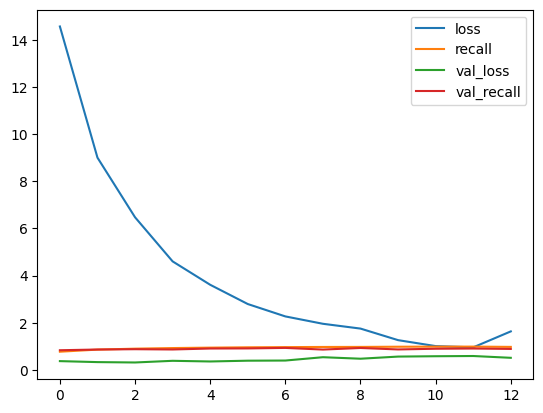

In [ ]:
model_loss.plot();

In [ ]:
model.evaluate(X_train, y_train)

566/566 [==============================] - 21s 37ms/step - loss: 0.1802 - recall: 0.9252


[0.18019677698612213, 0.9252241849899292]

In [ ]:
model.evaluate(X_test, y_test)

142/142 [==============================] - 5s 33ms/step - loss: 0.3178 - recall: 0.8803


[0.3177902400493622, 0.8802911639213562]

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, roc_auc_score

y_train_pred = (model.predict(X_train) >= 0.5).astype("int32")

print(confusion_matrix(y_train, y_train_pred))
print("-------------------------------------------------------")
print(classification_report(y_train, y_train_pred))

566/566 [==============================] - 20s 33ms/step
[[ 3241    40]
 [ 1109 13722]]
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.75      0.99      0.85      3281
           1       1.00      0.93      0.96     14831

    accuracy                           0.94     18112
   macro avg       0.87      0.96      0.90     18112
weighted avg       0.95      0.94      0.94     18112



In [ ]:
y_pred = (model.predict(X_test) >= 0.5).astype("int32")

print(confusion_matrix(y_test, y_pred))
print("-------------------------------------------------------")
print(classification_report(y_test, y_pred))

142/142 [==============================] - 6s 33ms/step
[[ 671  149]
 [ 444 3265]]
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.60      0.82      0.69       820
           1       0.96      0.88      0.92      3709

    accuracy                           0.87      4529
   macro avg       0.78      0.85      0.81      4529
weighted avg       0.89      0.87      0.88      4529



142/142 [==============================] - 4s 29ms/step


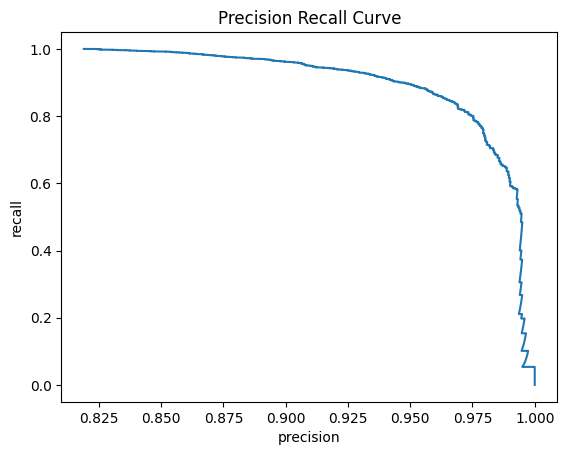

In [ ]:
from sklearn.metrics import precision_recall_curve, average_precision_score

y_pred_proba = model.predict(X_test)
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)

# plt.plot([1, 0], [0, 1],'k--')
plt.plot(precision, recall)
plt.xlabel('precision')
plt.ylabel('recall')
plt.title('Precision Recall Curve')
plt.show()

In [ ]:
from sklearn.metrics import precision_recall_curve, average_precision_score, recall_score

DL_AP = average_precision_score(y_test, y_pred_proba)
DL_f1 = f1_score(y_test, y_pred)
DL_rec = recall_score(y_test, y_pred)

# Model Comparison

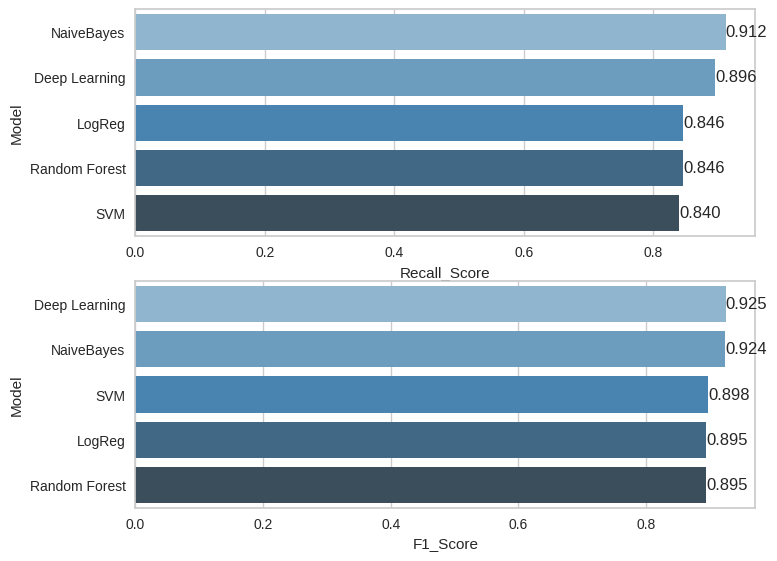

In [ ]:
compare = pd.DataFrame({"Model": ["LogReg", "SVM",
                                  "Random Forest", "NaiveBayes", "Deep Learning"],

                        "F1_Score": [log_tfidf_f1,
                                             svc_tfidf_f1, rf_tfidf_f1, nb_tfidf_f1, DL_f1],

                        "Recall_Score": [log_tfidf_rec, svc_tfidf_rec,
                                                  rf_tfidf_rec, nb_tfidf_rec, DL_rec]})

def labels(ax):

    for p in ax.patches:
        width = p.get_width()                        # get bar length
        ax.text(width,                               # set the text at 1 unit right of the bar
                p.get_y() + p.get_height() / 2,      # get Y coordinate + X coordinate / 2
                '{:1.3f}'.format(width),             # set variable to display, 2 decimals
                ha = 'left',                         # horizontal alignment
                va = 'center')                       # vertical alignment

plt.figure(figsize=(8,10))
plt.subplot(311)
compare = compare.sort_values(by="Recall_Score", ascending=False)
ax=sns.barplot(x="Recall_Score", y="Model", data=compare, palette="Blues_d")
labels(ax)

plt.subplot(312)
compare = compare.sort_values(by="F1_Score", ascending=False)
ax=sns.barplot(x="F1_Score", y="Model", data=compare, palette="Blues_d")
labels(ax)

plt.show();

# PREDICTION

In [107]:
review1 = "Love this dress"
review2 = "Absolutely wonderful. silky and sexy and comfortable"
review3 = "i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i could not zip it up!"
review4 = "I love, love, love this jumpsuit. it's fun, flirty, and fabulous! every time i wear it, i get nothing but great compliments!"
review5 = 'This shirt is very flattering to all due to the adjustable front tie. it is the perfect length to wear with leggings and it is sleeveless so it pairs well with any cardigan. love this shirt!!!'
review6 = 'I love tracy reese dresses, but this one is not for the very petite. i am just under 5 feet tall and usually wear a 0p in this brand. this dress was very pretty out of the package but its a lot of dress.'
review7 = 'I love this dress. i usually get an xs but it runs a little snug in bust so i ordered up a size. very flattering and feminine with the usual retailer flair for style.'
review8 = 'Dress runs small esp where the zipper area runs. i ordered the sp which typically fits me and it was very tight! the material on the top looks and feels very cheap that even just pulling on it will cause it to rip the fabric. pretty disappointed as it was going to be my christmas dress this year! needless to say it will be going back.'
review9 =  "if you are at least average height or taller, this may look good on you."
review10 = "sadly will be returning, but i'm sure i will find something to exchange it for!"
review11 = "Cute little dress fits tts. it is a little high waisted. good length for my 5'9 height. i like the dress, i'm just not in love with it. i dont think it looks or feels cheap. it appears just as pictured."
review12 = 'Loved the material, but i didnt really look at how long the dress was before i purchased both a large and a medium. im 5\'5" and there was atleast 5" of material at my feet. the gaps in the front are much wider than they look. felt like the dress just fell flat. both were returned. im usually a large and the med fit better. 36d 30 in jeans'
review13 = "I have been waiting for this sweater coat to ship for weeks and i was so excited for it to arrive. this coat is not true to size and made me look short and squat."
review14 = 'Very comfortable, material is good, cut out on sleeves flattering'
reviews = [review1, review2, review3, review4, review5, review6, review7, review8, review9, review10, review11, review12, review13, review14]
ytrain=[1,1,0,1,1,0,1,0,1,0,0,0,0,1]

In [108]:
reviews = [text for text in reviews if text is not None and not pd.isnull(text)]

In [110]:
new_reviews = [cleaning_fsa(text) for text in reviews]

In [111]:
print(new_reviews[9])

sadli return im sure find someth exchang


In [112]:
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_new_reviews = tfidf_vectorizer.transform(new_reviews)

# Naive Bayes

In [113]:
y_probas = model.predict_proba(X_new_reviews)

In [114]:
for text, y_probas in zip(reviews, y_probas):
    print(f"Text: {text}\nPredicted Label: {y_probas}\n")

Text: Love this dress
Predicted Label: [0.09578908 0.90421092]

Text: Absolutely wonderful. silky and sexy and comfortable
Predicted Label: [0.02874315 0.97125685]

Text: i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i could not zip it up!
Predicted Label: [0.23894746 0.76105254]

Text: I love, love, love this jumpsuit. it's fun, flirty, and fabulous! every time i wear it, i get nothing but great compliments!
Predicted Label: [0.01312421 0.98687579]

Text: This shirt is very flattering to all due to the adjustable front tie. it is the perfect length to wear with leggings and it is sleeveless so it pairs well with any cardigan. love this shirt!!!
Predicted Label: [0.03495394 0.96504606]

Text: I love tracy reese dresses, but this one is not for the very petite. i am just under 5 feet tall and usually wear a 0p in this brand. this dress was very pretty out of the package but its a lot of dress.
Predicted Label: [0.12

In [120]:
y_probas = model.predict_proba(X_new_reviews)
second_index_values = []

for y_probas_single in y_probas:
    second_index_values.append(y_probas_single[1])

# Now, the variable second_index_values contains the values of the second index
print(second_index_values)

[0.9042109176945549, 0.9712568461815311, 0.7610525432959807, 0.9868757880296345, 0.9650460619051353, 0.8739311475023785, 0.9677896511251886, 0.38744016519188335, 0.7541684619895453, 0.7427419768703669, 0.8724665816366209, 0.6566436557873025, 0.5946155087452883, 0.9061494471461563]


In [125]:
df_pred = pd.DataFrame(second_index_values, index=reviews)
df_pred.rename(columns={0: 'Pred_Proba'}, inplace=True)
df_pred["Predicted_Feedbaack"] = df_pred["Pred_Proba"].apply(lambda x: "Recommended" if x>=0.8 else "Not Recommended")
df_pred

,Pred_Proba,Predicted_Feedbaack
Love this dress,0.904211,Recommended
Absolutely wonderful. silky and sexy and comfortable,0.971257,Recommended
i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i could not zip it up!,0.761053,Not Recommended
"I love, love, love this jumpsuit. it's fun, flirty, and fabulous! every time i wear it, i get nothing but great compliments!",0.986876,Recommended
This shirt is very flattering to all due to the adjustable front tie. it is the perfect length to wear with leggings and it is sleeveless so it pairs well with any cardigan. love this shirt!!!,0.965046,Recommended
"I love tracy reese dresses, but this one is not for the very petite. i am just under 5 feet tall and usually wear a 0p in this brand. this dress was very pretty out of the package but its a lot of dress.",0.873931,Recommended
I love this dress. i usually get an xs but it runs a little snug in bust so i ordered up a size. very flattering and feminine with the usual retailer flair for style.,0.967790,Recommended
Dress runs small esp where the zipper area runs. i ordered the sp which typically fits me and it was very tight! the material on the top looks and feels very cheap that even just pulling on it will cause it to rip the fabric. pretty disappointed as it was going to be my christmas dress this year! needless to say it will be going back.,0.387440,Not Recommended
"if you are at least average height or taller, this may look good on you.",0.754168,Not Recommended
"sadly will be returning, but i'm sure i will find something to exchange it for!",0.742742,Not Recommended


# SVM

In [116]:
predictions = svc.predict(X_new_reviews)

In [117]:
df_pred = pd.DataFrame(predictions, index=reviews)
df_pred.rename(columns={0: 'Pred_Proba'}, inplace=True)
df_pred["Predicted_Feedbaack"] = df_pred["Pred_Proba"].apply(lambda x: "Recommended" if x>=0.5 else "Not Recommended")
df_pred

,Pred_Proba,Predicted_Feedbaack
Love this dress,1,Recommended
Absolutely wonderful. silky and sexy and comfortable,1,Recommended
i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i could not zip it up!,1,Recommended
"I love, love, love this jumpsuit. it's fun, flirty, and fabulous! every time i wear it, i get nothing but great compliments!",1,Recommended
This shirt is very flattering to all due to the adjustable front tie. it is the perfect length to wear with leggings and it is sleeveless so it pairs well with any cardigan. love this shirt!!!,1,Recommended
"I love tracy reese dresses, but this one is not for the very petite. i am just under 5 feet tall and usually wear a 0p in this brand. this dress was very pretty out of the package but its a lot of dress.",1,Recommended
I love this dress. i usually get an xs but it runs a little snug in bust so i ordered up a size. very flattering and feminine with the usual retailer flair for style.,1,Recommended
Dress runs small esp where the zipper area runs. i ordered the sp which typically fits me and it was very tight! the material on the top looks and feels very cheap that even just pulling on it will cause it to rip the fabric. pretty disappointed as it was going to be my christmas dress this year! needless to say it will be going back.,0,Not Recommended
"if you are at least average height or taller, this may look good on you.",0,Not Recommended
"sadly will be returning, but i'm sure i will find something to exchange it for!",0,Not Recommended


# Deep Learning

In [ ]:
tokens = tokenizer.texts_to_sequences(reviews)

In [ ]:
tokens_pad = pad_sequences(tokens, maxlen=max_tokens)
tokens_pad.shape

(14, 103)

In [ ]:
mod_pred = model.predict(tokens_pad)
mod_pred

1/1 [==============================] - 0s 191ms/step


array([[0.7052169 ],
       [0.94626486],
       [0.97809815],
       [0.9864052 ],
       [0.9857017 ],
       [0.3553793 ],
       [0.98526496],
       [0.02951365],
       [0.20945218],
       [0.58142716],
       [0.9152123 ],
       [0.08710153],
       [0.06517501],
       [0.7633842 ]], dtype=float32)

In [ ]:
df_pred = pd.DataFrame(mod_pred, index=reviews)
df_pred.rename(columns={0: 'Pred_Proba'}, inplace=True)
df_pred["Predicted_Feedbaack"] = df_pred["Pred_Proba"].apply(lambda x: "Recommended" if x>=0.5 else "Not Recommended")
df_pred

,Pred_Proba,Predicted_Feedbaack
Love this dress,0.705217,Recommended
Absolutely wonderful. silky and sexy and comfortable,0.946265,Recommended
i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i could not zip it up!,0.978098,Recommended
"I love, love, love this jumpsuit. it's fun, flirty, and fabulous! every time i wear it, i get nothing but great compliments!",0.986405,Recommended
This shirt is very flattering to all due to the adjustable front tie. it is the perfect length to wear with leggings and it is sleeveless so it pairs well with any cardigan. love this shirt!!!,0.985702,Recommended
"I love tracy reese dresses, but this one is not for the very petite. i am just under 5 feet tall and usually wear a 0p in this brand. this dress was very pretty out of the package but its a lot of dress.",0.355379,Not Recommended
I love this dress. i usually get an xs but it runs a little snug in bust so i ordered up a size. very flattering and feminine with the usual retailer flair for style.,0.985265,Recommended
Dress runs small esp where the zipper area runs. i ordered the sp which typically fits me and it was very tight! the material on the top looks and feels very cheap that even just pulling on it will cause it to rip the fabric. pretty disappointed as it was going to be my christmas dress this year! needless to say it will be going back.,0.029514,Not Recommended
"if you are at least average height or taller, this may look good on you.",0.209452,Not Recommended
"sadly will be returning, but i'm sure i will find something to exchange it for!",0.581427,Recommended


In [ ]:
review1 = "This dress is stunning! It makes me feel like a princess."
review2 = "The quality of the fabric in this dress is impressive."
review3 = "I'm in love with the fit and style of this dress."
review4 = "The color of this dress is even more beautiful in person."
review5 = "I received so many compliments on this dress at the party."
review6 = "This dress is perfect for a special occasion or a night out."
review7 = "I couldn't be happier with my purchase. This dress is a gem."
review8 = "I'm a repeat customer because their dresses are always fantastic."
review9 = "The attention to detail in this dress is remarkable."
review10 = "The sizing is accurate, and the dress is very comfortable."
review11 = "This dress is a great addition to my wardrobe."
review12 = "I've never felt so elegant in a dress before."
review13 = "The dress arrived on time and in perfect condition."
review14 = "I highly recommend this dress. It's a showstopper."
reviews = [review1, review2, review3, review4, review5, review6, review7, review8, review9, review10, review11, review12, review13, review14]

In [ ]:
tokens = tokenizer.texts_to_sequences(reviews)

tokens_pad = pad_sequences(tokens, maxlen=max_tokens)

mod_pred = model.predict(tokens_pad)

df_pred = pd.DataFrame(mod_pred, index=reviews)
df_pred.rename(columns={0: 'Pred_Proba'}, inplace=True)
df_pred["Predicted_Feedbaack"] = df_pred["Pred_Proba"].apply(lambda x: "Recommended" if x>=0.5 else "Not Recommended")
df_pred

1/1 [==============================] - 0s 83ms/step


,Pred_Proba,Predicted_Feedbaack
This dress is stunning! It makes me feel like a princess.,0.962103,Recommended
The quality of the fabric in this dress is impressive.,0.092363,Not Recommended
I'm in love with the fit and style of this dress.,0.841617,Recommended
The color of this dress is even more beautiful in person.,0.283152,Not Recommended
I received so many compliments on this dress at the party.,0.965686,Recommended
This dress is perfect for a special occasion or a night out.,0.964896,Recommended
I couldn't be happier with my purchase. This dress is a gem.,0.684201,Recommended
I'm a repeat customer because their dresses are always fantastic.,0.781392,Recommended
The attention to detail in this dress is remarkable.,0.789328,Recommended
"The sizing is accurate, and the dress is very comfortable.",0.417916,Not Recommended
